In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('C:/Users/mishr/OneDrive/Desktop/Data_Science/ML_Assignments/machine-learning-ex/ex2/ex2data1.txt',delimiter=',')


In [3]:
x = data[:,0:2]
y = data[:,2]

PLOT DATA

In [4]:
def plotData(x,y):
    pos =y==1
    neg =y==0
    plt.plot(x[pos,0],x[pos,1],'k+',ms=7,lw=2)
    plt.plot(x[neg,0],x[neg,1],'ko',mfc='y',ms=7)

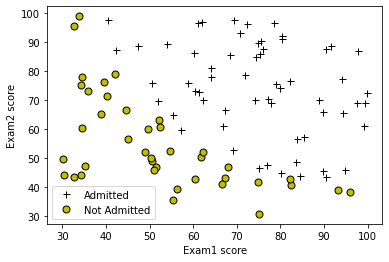

In [5]:
plotData(x,y)
plt.xlabel('Exam1 score')
plt.ylabel('Exam2 score')
plt.legend(['Admitted','Not Admitted'])

SIGMOID

In [6]:
def sigmoid(z):
    #1/(1+exp(-z))
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1/(1+np.exp(-z))
    return g


In [7]:
sigmoid(0)

0.5

cost function

In [8]:
m,n = x.shape
x=np.concatenate((np.ones((m,1)),x),axis=1)

In [9]:
def costFunction(theta,x,y):
    theta = np.array(theta)
    grad = np.zeros(theta.shape)
    m = y.size
    
    h = sigmoid(np.dot(x,theta))
    l1 = np.log(h)
    l2 = np.log(1-h)
    J = -1/m*(np.dot(y.T,l1)+np.dot((1-y).T,l2))
    grad = 1/m*np.dot(x.T,(h-y))
    return J,grad
    

In [10]:
initial_theta = np.zeros(n+1)
cost,grad = costFunction(initial_theta,x,y)
cost,grad

(0.6931471805599452, array([ -0.1       , -12.00921659, -11.26284221]))

Logistic Regression

In [11]:
def gradientDescent(x,y,alpha,theta,num_iters):
    m= len(y)
    j_history=[]
    for i in range(num_iters):
        j,g = costFunction(theta,x,y)
        theta = theta -alpha*g
        j_history.append(j)
        
    return theta,j_history

In [12]:
theta,J_history = gradientDescent(x,y,0.001,initial_theta,780000)

In [13]:
theta

array([-14.06422201,   0.11766643,   0.11175864])

In [14]:
cost,grad = costFunction(theta,x,y)
cost


0.2327447674540721

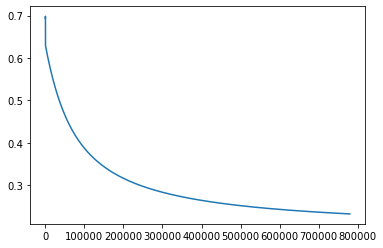

In [15]:
plt.plot(J_history)

In [16]:
def plotDecisionBoundary(theta,x,y):
    plot_x = np.array([np.min(x[:,1])-2,np.max(x[:,1])+2])
    plot_y = -1/theta[2]*(theta[1]*plot_x+theta[0])
    plotData(x,y)
    plt.xlabel('Exam1 score')
    plt.ylabel('Exam2 score')
    plt.legend(['Admitted','Not Admitted'])
    plt.plot(plot_x,plot_y,color='b')
    

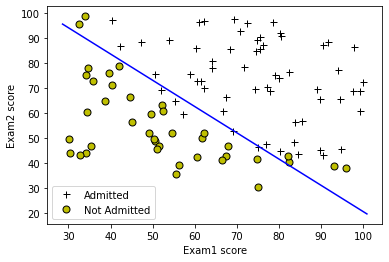

In [17]:
plotDecisionBoundary(theta,x[:,1:3],y)

Prediction function

In [18]:
def predict(theta,x):
    
    p = np.zeros(theta.shape)
    p = np.round(sigmoid(np.dot(x,theta)))
    return p

Accuracy

In [19]:

#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, x)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.675
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


Regularized Logistic Regression

In [20]:
data = np.loadtxt('C:/Users/mishr/OneDrive/Desktop/Data_Science/ML_Assignments/machine-learning-ex/ex2/ex2data2.txt',delimiter=',')

In [21]:
x = data[:,0:2]
y = data[:,2]

Visualize data

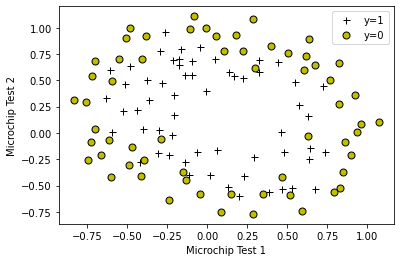

In [22]:
plotData(x,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y=1','y=0'])

Mapping feature

In [23]:
def mapfeatures(X1,X2):
    degree=6
    out = np.ones((X1.size,sum(range(degree+2))))
    curr_col =1
    for i in range(1,degree+1):
        for j in range(i+1):
            out[:,curr_col] = np.multiply(np.power(X1,i-j),np.power(X2,j))
            curr_col+=1
        
    return out

In [24]:
x = mapfeatures(x[:,0],x[:,1]);
x


array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

Regularized Cost Function

In [25]:
def regcostFunction(theta,X,y,lamda):
    theta = np.array(theta)
    grad = np.zeros(theta.shape)
    m=y.size
    h = sigmoid(np.dot(X,theta))
    temp = theta
    temp[0]=0
    J = -1/m*(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h))) + (lamda/(2*m))*sum(np.square(temp))
    grad = 1/m*(np.dot(X.T,h-y) + lamda*temp)
    return J,grad

In [185]:
initial_theta = np.zeros(x.shape[1])
lamda = 1
cost,grad = regcostFunction(initial_theta,x,y,lamda)


In [162]:
def gradientDescentReg(x,y,alpha,theta,num_iters,lamda):
    m= len(y)
    j_history=[]
    for i in range(num_iters):
        j,g = regcostFunction(theta,x,y,lamda)
        theta = theta -alpha*g
        j_history.append(j)
        
    return theta,j_history

In [187]:
theta,J_history = gradientDescentReg(x,y,0.001,initial_theta,780000,lamda)

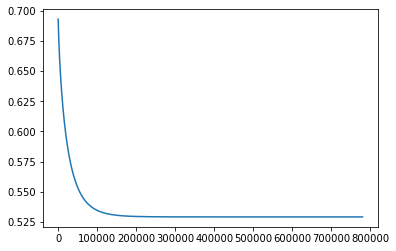

In [188]:
plt.plot(J_history)

PLOT DECISION BOUNDARY

In [166]:
def plotDecisionBoundaryReg(theta,X,y):
    fig = plt.figure()
    plotData(X[:,1:3], y)
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u),len(v)))
    # Evaluate z = theta*x over the grid
    for i in range(len(u)):
        for j in range(len(v)):
               z[i,j] = np.dot(mapfeatures(np.array([u[i]]), np.array([v[j]])),theta)
    z = np.transpose(z)
    plt.contour(u, v, z, levels=[0]).collections[0]
    plt.show(block=False)

        

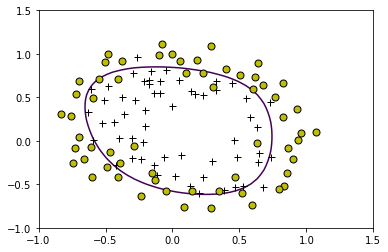

In [189]:
plotDecisionBoundaryReg(theta,x,y)

In [190]:
p = predict(theta, x)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')

Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)

